<a href="https://colab.research.google.com/github/FedericoBarona/AIDA/blob/main/58034_lab04_Jabolt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SSE, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class MultipleLinearRegression():
  def correlations(self, X, y):
    self.y = y.values
    self.x1 = X.iloc[::,0].values
    self.x2 = X.iloc[::,1].values
    sub_x1 = self.x1 - self.x1.mean()
    sub_x2 = self.x2 - self.x2.mean()
    sub_y = self.y - self.y.mean()
    cov1 = np.mean(sub_x1 * sub_y)
    cov2 = np.mean(sub_x2 * sub_y)
    self.std_x1 = np.std(self.x1)
    std_x2 = np.std(self.x2)
    self.std_y = np.std(self.y)
    self.corr = cov1 / (self.std_x1 * self.std_y)
    corr1 = cov2 / (std_x2 * self.std_y)
    corrs = np.array([corr1, self.corr])
    return print("R = ", corrs)

  def train(self, X,y):
    try:
      self.w1 = self.corr*(self.std_y/self.std_x1)
      self.w2 = self.y.mean() - self.w1*self.x1.mean()
      self.w0 = self.y.mean() - self.w1*self.x2.mean()
      self.model_ = print("w1:", self.w1, "\nw2:", self.w2, "\nw0:", self.w0,)
    except np.linalg.LinAlgError as err:
      if 'Singular matrix' in str(err):
        self.model_ = print("Singular Matrix error")
    except:
      self.model_ = print("Error")
    return self.model_
  
  def predict(self, x):
    self.result = self.w0 + np.dot(self.w1,x)
    self.pred = np.array(list(map(sum, self.result)))
    index = np.array(list(range(0, self.pred.size)))
    return print('\u0177 =',np.array(self.pred), ",\ni = ",index)

  def evaluate(self):
    n = y.size 
    k = 1
    self.predsize = np.array(self.pred).size

    SST = np.sum(np.square(y-y.mean()))
    SSR = np.sum(np.square(self.pred-y.mean()))
    SSE = np.sum(np.square(self.pred-y[0:self.predsize]))
    MSE = np.mean(np.square(self.pred - y[0:self.predsize]))
    RMSE = np.sqrt(MSE)
    rSquared = 1 - (SSE/SST)
    adjrSquared = 1 - ((1 - rSquared)*(n - 1)/(n-k-1))

    dictionary = {
         'SST' : SST,
         'SSR' : SSR,
         'SSE' : SSE,
         'MSE' : MSE,
         'RMSE' : RMSE,
         'R-squared' : rSquared,
         'Adjusted R-squared' : adjrSquared
         }
    return dictionary

  def visualize(self, X, y):
    Xt = X.iloc[::,0].values
    plt.figure(figsize=(5,5))
    plt.grid()
    plt.scatter(Xt, y)
    plt.plot(Xt, self.pred, color='red')
    plt.savefig("regression.jpg", dpi = 400)
    plt.show()
  ### Program the required methods

  ### You may add other helper functions in to make your code cleaner

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("/content/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [ ]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R

R =  [0.09301408 0.86298273]


Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [ ]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X_train,y_train)
regressor.model_

w1: 223.17874259460748 
w2: 101912.60180122903 
w0: -156880.06718590704


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56\\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [ ]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

ŷ = [257309.63217927 366140.5142181  469764.6361922  280629.57899298
 291342.15863752] ,
i =  [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared': 0.8325986289797467,
 'MSE': 19479591369.379265,
 'R-squared': 0.8342895519193452,
 'RMSE': 139569.30668803677,
 'SSE': 97397956846.89632,
 'SSR': 38311850792.93591,
 'SST': 587759902740.0532}

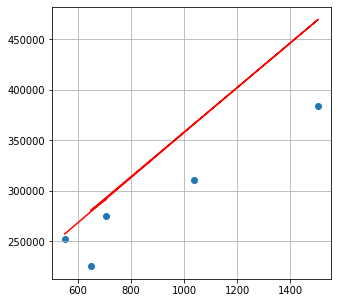

In [ ]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_test)